In [1]:
import scipy.io
import urllib.request
import dgl
import math
import random
import time
import copy
import joblib
import os, sys
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import dgl.function as fn
import matplotlib.pyplot as plt
from HGTDGL.model import *
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from utils import split_data, evaluate_auc, evaluate_acc
from transfer_func import no_transfer, transfer

0
LR: 0.00007, Train-Loss: 0.7343, Eval-Loss: 0.7360, Test-Loss: 0.7361, Train-ACC: 0.5001, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6503, Eval-Loss: 0.6515, Test-Loss: 0.6547, Train-ACC: 0.6371, Eval-ACC: 0.6591, Test-ACC: 0.6539, Best-Eval-ACC: 0.6591, Best-Test-ACC: 0.6539
LR: 0.00069, Train-Loss: 0.6201, Eval-Loss: 0.6353, Test-Loss: 0.6345, Train-ACC: 0.7168, Eval-ACC: 0.6980, Test-ACC: 0.6974, Best-Eval-ACC: 0.6980, Best-Test-ACC: 0.6974
LR: 0.00036, Train-Loss: 0.6099, Eval-Loss: 0.6356, Test-Loss: 0.6350, Train-ACC: 0.7464, Eval-ACC: 0.6929, Test-ACC: 0.6939, Best-Eval-ACC: 0.7005, Best-Test-ACC: 0.6987
LR: 0.00010, Train-Loss: 0.6072, Eval-Loss: 0.6355, Test-Loss: 0.6343, Train-ACC: 0.7566, Eval-ACC: 0.6934, Test-ACC: 0.6968, Best-Eval-ACC: 0.7005, Best-Test-ACC: 0.6987
---------------
LR: 0.00007, Train-Loss: 0.7374, Eval-Loss: 0.7385, Test-Loss: 0.7385, Train-ACC: 0.4999, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

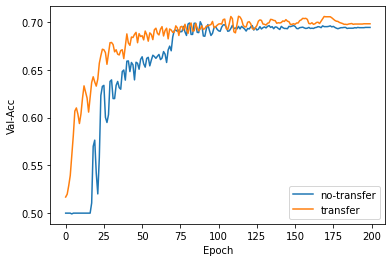

1
LR: 0.00007, Train-Loss: 0.7248, Eval-Loss: 0.7248, Test-Loss: 0.7248, Train-ACC: 0.5156, Eval-ACC: 0.5079, Test-ACC: 0.5030, Best-Eval-ACC: 0.5079, Best-Test-ACC: 0.5030
LR: 0.00093, Train-Loss: 0.6411, Eval-Loss: 0.6485, Test-Loss: 0.6486, Train-ACC: 0.6694, Eval-ACC: 0.6428, Test-ACC: 0.6414, Best-Eval-ACC: 0.6638, Best-Test-ACC: 0.6650
LR: 0.00069, Train-Loss: 0.6127, Eval-Loss: 0.6291, Test-Loss: 0.6336, Train-ACC: 0.7481, Eval-ACC: 0.7027, Test-ACC: 0.6960, Best-Eval-ACC: 0.7116, Best-Test-ACC: 0.7083
LR: 0.00036, Train-Loss: 0.6047, Eval-Loss: 0.6285, Test-Loss: 0.6336, Train-ACC: 0.7616, Eval-ACC: 0.7135, Test-ACC: 0.7047, Best-Eval-ACC: 0.7176, Best-Test-ACC: 0.7088
LR: 0.00010, Train-Loss: 0.6019, Eval-Loss: 0.6283, Test-Loss: 0.6344, Train-ACC: 0.7685, Eval-ACC: 0.7135, Test-ACC: 0.7036, Best-Eval-ACC: 0.7176, Best-Test-ACC: 0.7088
---------------
LR: 0.00007, Train-Loss: 0.7236, Eval-Loss: 0.7224, Test-Loss: 0.7224, Train-ACC: 0.5012, Eval-ACC: 0.5004, Test-ACC: 0.4996, B

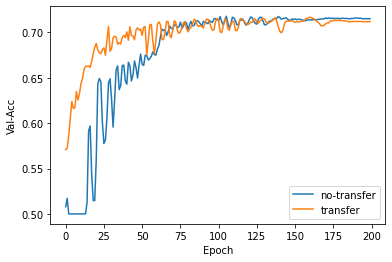

2
LR: 0.00007, Train-Loss: 0.7168, Eval-Loss: 0.7155, Test-Loss: 0.7155, Train-ACC: 0.4990, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6426, Eval-Loss: 0.6449, Test-Loss: 0.6493, Train-ACC: 0.6826, Eval-ACC: 0.6578, Test-ACC: 0.6490, Best-Eval-ACC: 0.6776, Best-Test-ACC: 0.6642
LR: 0.00069, Train-Loss: 0.6148, Eval-Loss: 0.6351, Test-Loss: 0.6386, Train-ACC: 0.7425, Eval-ACC: 0.6997, Test-ACC: 0.6881, Best-Eval-ACC: 0.7051, Best-Test-ACC: 0.6914
LR: 0.00036, Train-Loss: 0.6073, Eval-Loss: 0.6373, Test-Loss: 0.6400, Train-ACC: 0.7554, Eval-ACC: 0.7024, Test-ACC: 0.6936, Best-Eval-ACC: 0.7076, Best-Test-ACC: 0.6928
LR: 0.00010, Train-Loss: 0.6027, Eval-Loss: 0.6373, Test-Loss: 0.6388, Train-ACC: 0.7684, Eval-ACC: 0.7018, Test-ACC: 0.6947, Best-Eval-ACC: 0.7076, Best-Test-ACC: 0.6928
---------------
LR: 0.00007, Train-Loss: 0.7189, Eval-Loss: 0.7182, Test-Loss: 0.7182, Train-ACC: 0.5015, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

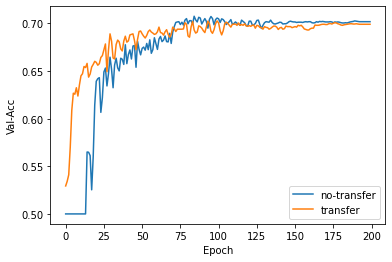

3
LR: 0.00007, Train-Loss: 0.7253, Eval-Loss: 0.7244, Test-Loss: 0.7244, Train-ACC: 0.4995, Eval-ACC: 0.5141, Test-ACC: 0.5109, Best-Eval-ACC: 0.5141, Best-Test-ACC: 0.5109
LR: 0.00093, Train-Loss: 0.6446, Eval-Loss: 0.6475, Test-Loss: 0.6518, Train-ACC: 0.6791, Eval-ACC: 0.6387, Test-ACC: 0.6330, Best-Eval-ACC: 0.6703, Best-Test-ACC: 0.6544
LR: 0.00069, Train-Loss: 0.6130, Eval-Loss: 0.6331, Test-Loss: 0.6404, Train-ACC: 0.7439, Eval-ACC: 0.6970, Test-ACC: 0.6816, Best-Eval-ACC: 0.7067, Best-Test-ACC: 0.6895
LR: 0.00036, Train-Loss: 0.6058, Eval-Loss: 0.6317, Test-Loss: 0.6414, Train-ACC: 0.7591, Eval-ACC: 0.7103, Test-ACC: 0.6892, Best-Eval-ACC: 0.7149, Best-Test-ACC: 0.6947
LR: 0.00010, Train-Loss: 0.6020, Eval-Loss: 0.6327, Test-Loss: 0.6414, Train-ACC: 0.7696, Eval-ACC: 0.7070, Test-ACC: 0.6900, Best-Eval-ACC: 0.7149, Best-Test-ACC: 0.6947
---------------
LR: 0.00007, Train-Loss: 0.7224, Eval-Loss: 0.7217, Test-Loss: 0.7217, Train-ACC: 0.5146, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

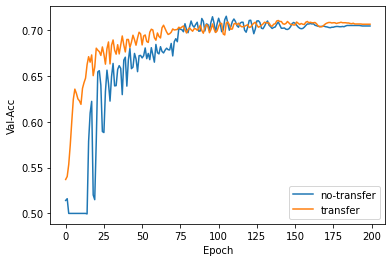

4
LR: 0.00007, Train-Loss: 0.7265, Eval-Loss: 0.7257, Test-Loss: 0.7256, Train-ACC: 0.4928, Eval-ACC: 0.4992, Test-ACC: 0.4997, Best-Eval-ACC: 0.4992, Best-Test-ACC: 0.4997
LR: 0.00093, Train-Loss: 0.6394, Eval-Loss: 0.6505, Test-Loss: 0.6496, Train-ACC: 0.6731, Eval-ACC: 0.6561, Test-ACC: 0.6634, Best-Eval-ACC: 0.6561, Best-Test-ACC: 0.6634
LR: 0.00069, Train-Loss: 0.6078, Eval-Loss: 0.6380, Test-Loss: 0.6348, Train-ACC: 0.7547, Eval-ACC: 0.6989, Test-ACC: 0.7055, Best-Eval-ACC: 0.6989, Best-Test-ACC: 0.7061
LR: 0.00036, Train-Loss: 0.6017, Eval-Loss: 0.6370, Test-Loss: 0.6383, Train-ACC: 0.7683, Eval-ACC: 0.7029, Test-ACC: 0.7001, Best-Eval-ACC: 0.7029, Best-Test-ACC: 0.6996
LR: 0.00010, Train-Loss: 0.5988, Eval-Loss: 0.6367, Test-Loss: 0.6378, Train-ACC: 0.7780, Eval-ACC: 0.7018, Test-ACC: 0.6985, Best-Eval-ACC: 0.7029, Best-Test-ACC: 0.6996
---------------
LR: 0.00007, Train-Loss: 0.7276, Eval-Loss: 0.7284, Test-Loss: 0.7283, Train-ACC: 0.5008, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

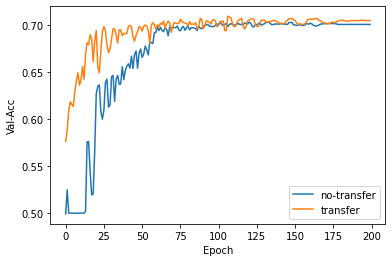

5
LR: 0.00007, Train-Loss: 0.7207, Eval-Loss: 0.7190, Test-Loss: 0.7191, Train-ACC: 0.4949, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6479, Eval-Loss: 0.6514, Test-Loss: 0.6452, Train-ACC: 0.6439, Eval-ACC: 0.6488, Test-ACC: 0.6593, Best-Eval-ACC: 0.6583, Best-Test-ACC: 0.6765
LR: 0.00069, Train-Loss: 0.6118, Eval-Loss: 0.6317, Test-Loss: 0.6275, Train-ACC: 0.7467, Eval-ACC: 0.7081, Test-ACC: 0.7186, Best-Eval-ACC: 0.7081, Best-Test-ACC: 0.7186
LR: 0.00036, Train-Loss: 0.6033, Eval-Loss: 0.6328, Test-Loss: 0.6279, Train-ACC: 0.7666, Eval-ACC: 0.7016, Test-ACC: 0.7156, Best-Eval-ACC: 0.7087, Best-Test-ACC: 0.7210
LR: 0.00010, Train-Loss: 0.6001, Eval-Loss: 0.6329, Test-Loss: 0.6275, Train-ACC: 0.7733, Eval-ACC: 0.7018, Test-ACC: 0.7164, Best-Eval-ACC: 0.7087, Best-Test-ACC: 0.7210
---------------
LR: 0.00007, Train-Loss: 0.7262, Eval-Loss: 0.7246, Test-Loss: 0.7247, Train-ACC: 0.4985, Eval-ACC: 0.5016, Test-ACC: 0.4886, B

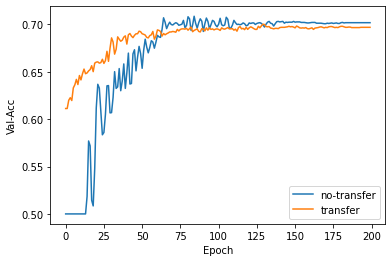

6
LR: 0.00007, Train-Loss: 0.7312, Eval-Loss: 0.7323, Test-Loss: 0.7323, Train-ACC: 0.5007, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6485, Eval-Loss: 0.6451, Test-Loss: 0.6452, Train-ACC: 0.6813, Eval-ACC: 0.6855, Test-ACC: 0.6854, Best-Eval-ACC: 0.6855, Best-Test-ACC: 0.6854
LR: 0.00069, Train-Loss: 0.6135, Eval-Loss: 0.6327, Test-Loss: 0.6304, Train-ACC: 0.7451, Eval-ACC: 0.7097, Test-ACC: 0.7183, Best-Eval-ACC: 0.7130, Best-Test-ACC: 0.7132
LR: 0.00036, Train-Loss: 0.6038, Eval-Loss: 0.6303, Test-Loss: 0.6308, Train-ACC: 0.7676, Eval-ACC: 0.7138, Test-ACC: 0.7110, Best-Eval-ACC: 0.7157, Best-Test-ACC: 0.7191
LR: 0.00010, Train-Loss: 0.6010, Eval-Loss: 0.6310, Test-Loss: 0.6321, Train-ACC: 0.7719, Eval-ACC: 0.7092, Test-ACC: 0.7091, Best-Eval-ACC: 0.7157, Best-Test-ACC: 0.7191
---------------
LR: 0.00007, Train-Loss: 0.7203, Eval-Loss: 0.7191, Test-Loss: 0.7191, Train-ACC: 0.5004, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

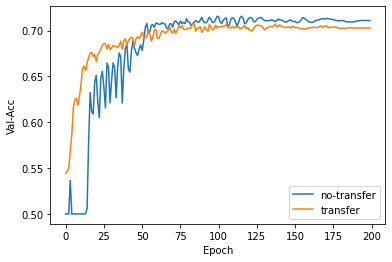

7
LR: 0.00007, Train-Loss: 0.7228, Eval-Loss: 0.7216, Test-Loss: 0.7216, Train-ACC: 0.4946, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6471, Eval-Loss: 0.6550, Test-Loss: 0.6531, Train-ACC: 0.6384, Eval-ACC: 0.6649, Test-ACC: 0.6716, Best-Eval-ACC: 0.6649, Best-Test-ACC: 0.6716
LR: 0.00069, Train-Loss: 0.6164, Eval-Loss: 0.6361, Test-Loss: 0.6358, Train-ACC: 0.7272, Eval-ACC: 0.6945, Test-ACC: 0.6952, Best-Eval-ACC: 0.6975, Best-Test-ACC: 0.7007
LR: 0.00036, Train-Loss: 0.6064, Eval-Loss: 0.6356, Test-Loss: 0.6372, Train-ACC: 0.7558, Eval-ACC: 0.6915, Test-ACC: 0.6887, Best-Eval-ACC: 0.7018, Best-Test-ACC: 0.7045
LR: 0.00010, Train-Loss: 0.6024, Eval-Loss: 0.6367, Test-Loss: 0.6387, Train-ACC: 0.7674, Eval-ACC: 0.6940, Test-ACC: 0.6892, Best-Eval-ACC: 0.7018, Best-Test-ACC: 0.7045
---------------
LR: 0.00007, Train-Loss: 0.7243, Eval-Loss: 0.7249, Test-Loss: 0.7249, Train-ACC: 0.5113, Eval-ACC: 0.4984, Test-ACC: 0.4984, B

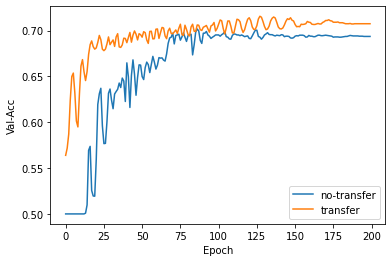

8
LR: 0.00007, Train-Loss: 0.7280, Eval-Loss: 0.7290, Test-Loss: 0.7290, Train-ACC: 0.4888, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6419, Eval-Loss: 0.6512, Test-Loss: 0.6457, Train-ACC: 0.6706, Eval-ACC: 0.6591, Test-ACC: 0.6688, Best-Eval-ACC: 0.6591, Best-Test-ACC: 0.6688
LR: 0.00069, Train-Loss: 0.6129, Eval-Loss: 0.6325, Test-Loss: 0.6336, Train-ACC: 0.7492, Eval-ACC: 0.7002, Test-ACC: 0.6947, Best-Eval-ACC: 0.7076, Best-Test-ACC: 0.7064
LR: 0.00036, Train-Loss: 0.6040, Eval-Loss: 0.6306, Test-Loss: 0.6330, Train-ACC: 0.7647, Eval-ACC: 0.7092, Test-ACC: 0.7045, Best-Eval-ACC: 0.7127, Best-Test-ACC: 0.7055
LR: 0.00010, Train-Loss: 0.6015, Eval-Loss: 0.6305, Test-Loss: 0.6337, Train-ACC: 0.7699, Eval-ACC: 0.7097, Test-ACC: 0.7007, Best-Eval-ACC: 0.7127, Best-Test-ACC: 0.7055
---------------
LR: 0.00007, Train-Loss: 0.7273, Eval-Loss: 0.7258, Test-Loss: 0.7257, Train-ACC: 0.4919, Eval-ACC: 0.5016, Test-ACC: 0.4980, B

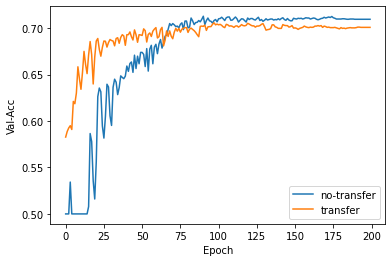

9
LR: 0.00007, Train-Loss: 0.7167, Eval-Loss: 0.7149, Test-Loss: 0.7149, Train-ACC: 0.4988, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6478, Eval-Loss: 0.6549, Test-Loss: 0.6522, Train-ACC: 0.6797, Eval-ACC: 0.6211, Test-ACC: 0.6321, Best-Eval-ACC: 0.6581, Best-Test-ACC: 0.6686
LR: 0.00069, Train-Loss: 0.6132, Eval-Loss: 0.6335, Test-Loss: 0.6347, Train-ACC: 0.7401, Eval-ACC: 0.7038, Test-ACC: 0.7020, Best-Eval-ACC: 0.7054, Best-Test-ACC: 0.7047
LR: 0.00036, Train-Loss: 0.6039, Eval-Loss: 0.6325, Test-Loss: 0.6352, Train-ACC: 0.7665, Eval-ACC: 0.7130, Test-ACC: 0.7083, Best-Eval-ACC: 0.7146, Best-Test-ACC: 0.7045
LR: 0.00010, Train-Loss: 0.6011, Eval-Loss: 0.6327, Test-Loss: 0.6356, Train-ACC: 0.7703, Eval-ACC: 0.7076, Test-ACC: 0.7020, Best-Eval-ACC: 0.7146, Best-Test-ACC: 0.7045
---------------
LR: 0.00007, Train-Loss: 0.7340, Eval-Loss: 0.7350, Test-Loss: 0.7350, Train-ACC: 0.4997, Eval-ACC: 0.5000, Test-ACC: 0.5000, B

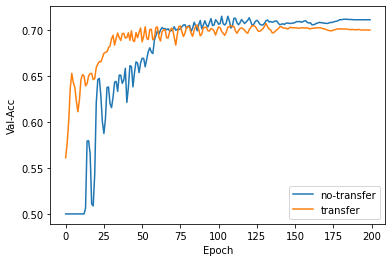

10
LR: 0.00007, Train-Loss: 0.7224, Eval-Loss: 0.7209, Test-Loss: 0.7209, Train-ACC: 0.4949, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6430, Eval-Loss: 0.6509, Test-Loss: 0.6491, Train-ACC: 0.6743, Eval-ACC: 0.6697, Test-ACC: 0.6735, Best-Eval-ACC: 0.6697, Best-Test-ACC: 0.6735
LR: 0.00069, Train-Loss: 0.6105, Eval-Loss: 0.6348, Test-Loss: 0.6280, Train-ACC: 0.7539, Eval-ACC: 0.6972, Test-ACC: 0.7088, Best-Eval-ACC: 0.7054, Best-Test-ACC: 0.7104
LR: 0.00036, Train-Loss: 0.6030, Eval-Loss: 0.6367, Test-Loss: 0.6298, Train-ACC: 0.7690, Eval-ACC: 0.7002, Test-ACC: 0.7137, Best-Eval-ACC: 0.7054, Best-Test-ACC: 0.7104
LR: 0.00010, Train-Loss: 0.6006, Eval-Loss: 0.6368, Test-Loss: 0.6300, Train-ACC: 0.7758, Eval-ACC: 0.6980, Test-ACC: 0.7118, Best-Eval-ACC: 0.7054, Best-Test-ACC: 0.7104
---------------
LR: 0.00007, Train-Loss: 0.7307, Eval-Loss: 0.7307, Test-Loss: 0.7306, Train-ACC: 0.5005, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

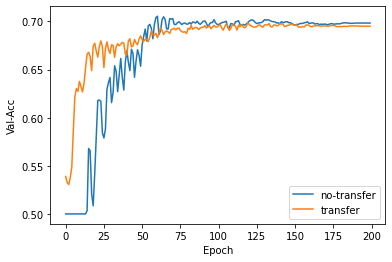

11
LR: 0.00007, Train-Loss: 0.7180, Eval-Loss: 0.7171, Test-Loss: 0.7171, Train-ACC: 0.4997, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6421, Eval-Loss: 0.6525, Test-Loss: 0.6530, Train-ACC: 0.6668, Eval-ACC: 0.6300, Test-ACC: 0.6313, Best-Eval-ACC: 0.6638, Best-Test-ACC: 0.6593
LR: 0.00069, Train-Loss: 0.6148, Eval-Loss: 0.6375, Test-Loss: 0.6371, Train-ACC: 0.7361, Eval-ACC: 0.6950, Test-ACC: 0.6977, Best-Eval-ACC: 0.6997, Best-Test-ACC: 0.6977
LR: 0.00036, Train-Loss: 0.6050, Eval-Loss: 0.6365, Test-Loss: 0.6355, Train-ACC: 0.7653, Eval-ACC: 0.6967, Test-ACC: 0.6987, Best-Eval-ACC: 0.7005, Best-Test-ACC: 0.7012
LR: 0.00010, Train-Loss: 0.6022, Eval-Loss: 0.6360, Test-Loss: 0.6357, Train-ACC: 0.7701, Eval-ACC: 0.6997, Test-ACC: 0.7015, Best-Eval-ACC: 0.7013, Best-Test-ACC: 0.7007
---------------
LR: 0.00007, Train-Loss: 0.7241, Eval-Loss: 0.7249, Test-Loss: 0.7249, Train-ACC: 0.5083, Eval-ACC: 0.5008, Test-ACC: 0.4959, 

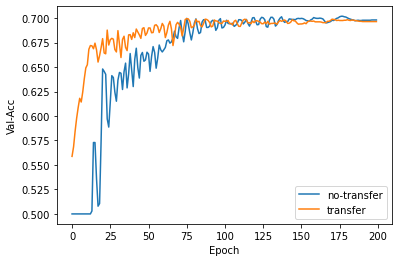

12
LR: 0.00007, Train-Loss: 0.7189, Eval-Loss: 0.7166, Test-Loss: 0.7166, Train-ACC: 0.5014, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6422, Eval-Loss: 0.6511, Test-Loss: 0.6531, Train-ACC: 0.6850, Eval-ACC: 0.6333, Test-ACC: 0.6270, Best-Eval-ACC: 0.6616, Best-Test-ACC: 0.6574
LR: 0.00069, Train-Loss: 0.6117, Eval-Loss: 0.6393, Test-Loss: 0.6396, Train-ACC: 0.7461, Eval-ACC: 0.7038, Test-ACC: 0.6998, Best-Eval-ACC: 0.7038, Best-Test-ACC: 0.6998
LR: 0.00036, Train-Loss: 0.6026, Eval-Loss: 0.6377, Test-Loss: 0.6389, Train-ACC: 0.7693, Eval-ACC: 0.7024, Test-ACC: 0.6971, Best-Eval-ACC: 0.7057, Best-Test-ACC: 0.6979
LR: 0.00010, Train-Loss: 0.6000, Eval-Loss: 0.6374, Test-Loss: 0.6380, Train-ACC: 0.7742, Eval-ACC: 0.6983, Test-ACC: 0.6930, Best-Eval-ACC: 0.7057, Best-Test-ACC: 0.6979
---------------
LR: 0.00007, Train-Loss: 0.7309, Eval-Loss: 0.7305, Test-Loss: 0.7305, Train-ACC: 0.4974, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

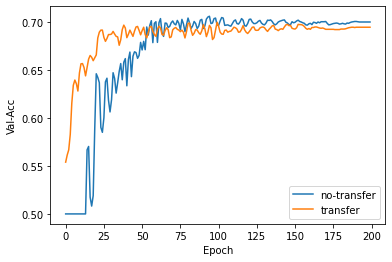

13
LR: 0.00007, Train-Loss: 0.7220, Eval-Loss: 0.7223, Test-Loss: 0.7223, Train-ACC: 0.5025, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6434, Eval-Loss: 0.6495, Test-Loss: 0.6480, Train-ACC: 0.6617, Eval-ACC: 0.6711, Test-ACC: 0.6716, Best-Eval-ACC: 0.6711, Best-Test-ACC: 0.6716
LR: 0.00069, Train-Loss: 0.6218, Eval-Loss: 0.6370, Test-Loss: 0.6322, Train-ACC: 0.7345, Eval-ACC: 0.6959, Test-ACC: 0.7050, Best-Eval-ACC: 0.6986, Best-Test-ACC: 0.7066
LR: 0.00036, Train-Loss: 0.6098, Eval-Loss: 0.6360, Test-Loss: 0.6319, Train-ACC: 0.7490, Eval-ACC: 0.6926, Test-ACC: 0.7026, Best-Eval-ACC: 0.7029, Best-Test-ACC: 0.7094
LR: 0.00010, Train-Loss: 0.6052, Eval-Loss: 0.6362, Test-Loss: 0.6308, Train-ACC: 0.7609, Eval-ACC: 0.6975, Test-ACC: 0.7104, Best-Eval-ACC: 0.7029, Best-Test-ACC: 0.7094
---------------
LR: 0.00007, Train-Loss: 0.7323, Eval-Loss: 0.7328, Test-Loss: 0.7329, Train-ACC: 0.5014, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

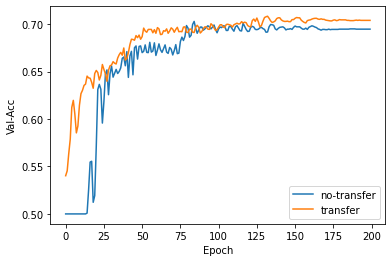

14
LR: 0.00007, Train-Loss: 0.7270, Eval-Loss: 0.7271, Test-Loss: 0.7271, Train-ACC: 0.5018, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6450, Eval-Loss: 0.6472, Test-Loss: 0.6485, Train-ACC: 0.6747, Eval-ACC: 0.6581, Test-ACC: 0.6563, Best-Eval-ACC: 0.6692, Best-Test-ACC: 0.6672
LR: 0.00069, Train-Loss: 0.6110, Eval-Loss: 0.6386, Test-Loss: 0.6350, Train-ACC: 0.7490, Eval-ACC: 0.6980, Test-ACC: 0.7064, Best-Eval-ACC: 0.6983, Best-Test-ACC: 0.7031
LR: 0.00036, Train-Loss: 0.6043, Eval-Loss: 0.6381, Test-Loss: 0.6341, Train-ACC: 0.7668, Eval-ACC: 0.6934, Test-ACC: 0.6990, Best-Eval-ACC: 0.6983, Best-Test-ACC: 0.7031
LR: 0.00010, Train-Loss: 0.6005, Eval-Loss: 0.6374, Test-Loss: 0.6335, Train-ACC: 0.7721, Eval-ACC: 0.6948, Test-ACC: 0.7039, Best-Eval-ACC: 0.6983, Best-Test-ACC: 0.7031
---------------
LR: 0.00007, Train-Loss: 0.7317, Eval-Loss: 0.7319, Test-Loss: 0.7319, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

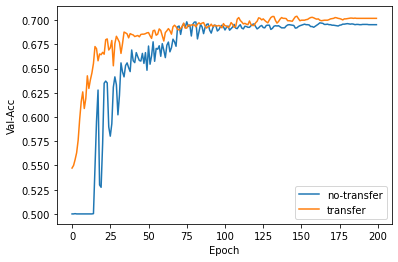

15
LR: 0.00007, Train-Loss: 0.7213, Eval-Loss: 0.7204, Test-Loss: 0.7204, Train-ACC: 0.5044, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6400, Eval-Loss: 0.6474, Test-Loss: 0.6512, Train-ACC: 0.6801, Eval-ACC: 0.6746, Test-ACC: 0.6648, Best-Eval-ACC: 0.6746, Best-Test-ACC: 0.6648
LR: 0.00069, Train-Loss: 0.6133, Eval-Loss: 0.6322, Test-Loss: 0.6348, Train-ACC: 0.7528, Eval-ACC: 0.7108, Test-ACC: 0.7009, Best-Eval-ACC: 0.7130, Best-Test-ACC: 0.7034
LR: 0.00036, Train-Loss: 0.6034, Eval-Loss: 0.6290, Test-Loss: 0.6359, Train-ACC: 0.7702, Eval-ACC: 0.7179, Test-ACC: 0.7015, Best-Eval-ACC: 0.7190, Best-Test-ACC: 0.7020
LR: 0.00010, Train-Loss: 0.6003, Eval-Loss: 0.6287, Test-Loss: 0.6355, Train-ACC: 0.7750, Eval-ACC: 0.7176, Test-ACC: 0.7009, Best-Eval-ACC: 0.7190, Best-Test-ACC: 0.7020
---------------
LR: 0.00007, Train-Loss: 0.7128, Eval-Loss: 0.7106, Test-Loss: 0.7106, Train-ACC: 0.4995, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

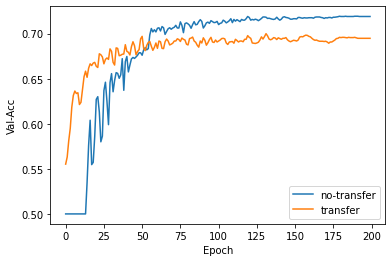

16
LR: 0.00007, Train-Loss: 0.7224, Eval-Loss: 0.7219, Test-Loss: 0.7219, Train-ACC: 0.5079, Eval-ACC: 0.5000, Test-ACC: 0.4997, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4997
LR: 0.00093, Train-Loss: 0.6448, Eval-Loss: 0.6510, Test-Loss: 0.6516, Train-ACC: 0.6583, Eval-ACC: 0.6697, Test-ACC: 0.6691, Best-Eval-ACC: 0.6697, Best-Test-ACC: 0.6691
LR: 0.00069, Train-Loss: 0.6179, Eval-Loss: 0.6349, Test-Loss: 0.6366, Train-ACC: 0.7390, Eval-ACC: 0.6975, Test-ACC: 0.6979, Best-Eval-ACC: 0.6975, Best-Test-ACC: 0.6979
LR: 0.00036, Train-Loss: 0.6076, Eval-Loss: 0.6372, Test-Loss: 0.6384, Train-ACC: 0.7548, Eval-ACC: 0.6956, Test-ACC: 0.6990, Best-Eval-ACC: 0.6980, Best-Test-ACC: 0.7012
LR: 0.00010, Train-Loss: 0.6034, Eval-Loss: 0.6381, Test-Loss: 0.6393, Train-ACC: 0.7626, Eval-ACC: 0.6926, Test-ACC: 0.6960, Best-Eval-ACC: 0.6980, Best-Test-ACC: 0.7012
---------------
LR: 0.00007, Train-Loss: 0.7251, Eval-Loss: 0.7245, Test-Loss: 0.7244, Train-ACC: 0.5028, Eval-ACC: 0.4817, Test-ACC: 0.5004, 

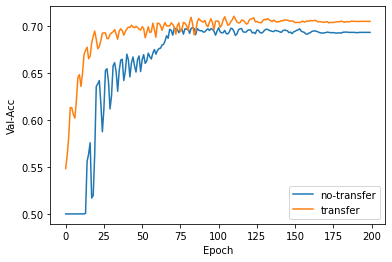

17
LR: 0.00007, Train-Loss: 0.7139, Eval-Loss: 0.7120, Test-Loss: 0.7120, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6439, Eval-Loss: 0.6522, Test-Loss: 0.6491, Train-ACC: 0.6723, Eval-ACC: 0.6608, Test-ACC: 0.6697, Best-Eval-ACC: 0.6608, Best-Test-ACC: 0.6697
LR: 0.00069, Train-Loss: 0.6145, Eval-Loss: 0.6299, Test-Loss: 0.6314, Train-ACC: 0.7401, Eval-ACC: 0.7122, Test-ACC: 0.7066, Best-Eval-ACC: 0.7122, Best-Test-ACC: 0.7066
LR: 0.00036, Train-Loss: 0.6075, Eval-Loss: 0.6296, Test-Loss: 0.6316, Train-ACC: 0.7582, Eval-ACC: 0.7138, Test-ACC: 0.7064, Best-Eval-ACC: 0.7163, Best-Test-ACC: 0.7094
LR: 0.00010, Train-Loss: 0.6036, Eval-Loss: 0.6303, Test-Loss: 0.6322, Train-ACC: 0.7637, Eval-ACC: 0.7103, Test-ACC: 0.7058, Best-Eval-ACC: 0.7163, Best-Test-ACC: 0.7094
---------------
LR: 0.00007, Train-Loss: 0.7207, Eval-Loss: 0.7192, Test-Loss: 0.7191, Train-ACC: 0.5061, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

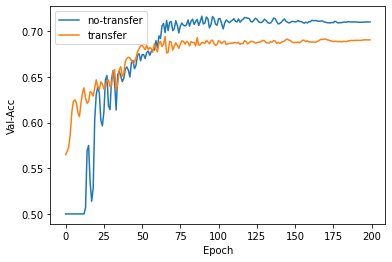

18
LR: 0.00007, Train-Loss: 0.7359, Eval-Loss: 0.7376, Test-Loss: 0.7376, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6507, Eval-Loss: 0.6562, Test-Loss: 0.6500, Train-ACC: 0.6568, Eval-ACC: 0.6423, Test-ACC: 0.6569, Best-Eval-ACC: 0.6453, Best-Test-ACC: 0.6452
LR: 0.00069, Train-Loss: 0.6183, Eval-Loss: 0.6379, Test-Loss: 0.6342, Train-ACC: 0.7356, Eval-ACC: 0.7013, Test-ACC: 0.7066, Best-Eval-ACC: 0.7032, Best-Test-ACC: 0.7055
LR: 0.00036, Train-Loss: 0.6096, Eval-Loss: 0.6382, Test-Loss: 0.6341, Train-ACC: 0.7521, Eval-ACC: 0.7018, Test-ACC: 0.7088, Best-Eval-ACC: 0.7040, Best-Test-ACC: 0.7077
LR: 0.00010, Train-Loss: 0.6060, Eval-Loss: 0.6383, Test-Loss: 0.6340, Train-ACC: 0.7601, Eval-ACC: 0.6967, Test-ACC: 0.7034, Best-Eval-ACC: 0.7040, Best-Test-ACC: 0.7077
---------------
LR: 0.00007, Train-Loss: 0.7257, Eval-Loss: 0.7267, Test-Loss: 0.7267, Train-ACC: 0.5084, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

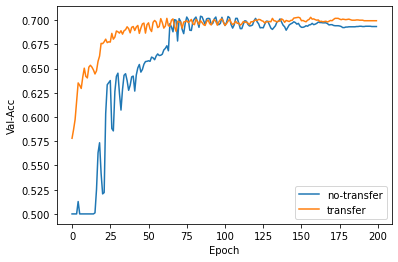

19
LR: 0.00007, Train-Loss: 0.7307, Eval-Loss: 0.7291, Test-Loss: 0.7291, Train-ACC: 0.4997, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00093, Train-Loss: 0.6454, Eval-Loss: 0.6515, Test-Loss: 0.6487, Train-ACC: 0.6642, Eval-ACC: 0.6480, Test-ACC: 0.6495, Best-Eval-ACC: 0.6488, Best-Test-ACC: 0.6533
LR: 0.00069, Train-Loss: 0.6129, Eval-Loss: 0.6367, Test-Loss: 0.6348, Train-ACC: 0.7450, Eval-ACC: 0.6885, Test-ACC: 0.6895, Best-Eval-ACC: 0.7062, Best-Test-ACC: 0.7007
LR: 0.00036, Train-Loss: 0.6036, Eval-Loss: 0.6356, Test-Loss: 0.6349, Train-ACC: 0.7647, Eval-ACC: 0.6956, Test-ACC: 0.6917, Best-Eval-ACC: 0.7062, Best-Test-ACC: 0.7007
LR: 0.00010, Train-Loss: 0.6009, Eval-Loss: 0.6355, Test-Loss: 0.6356, Train-ACC: 0.7712, Eval-ACC: 0.7005, Test-ACC: 0.6958, Best-Eval-ACC: 0.7062, Best-Test-ACC: 0.7007
---------------
LR: 0.00007, Train-Loss: 0.7195, Eval-Loss: 0.7193, Test-Loss: 0.7193, Train-ACC: 0.5026, Eval-ACC: 0.5000, Test-ACC: 0.5000, 

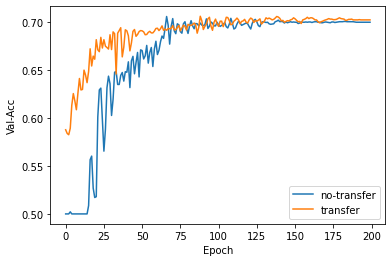

NO TRANSFER -- Total Time: 108.1094 +/- 2.0216, Best Model Time: 52.7903 +/- 16.0780, Best Val Acc: 0.7078 +/- 0.0066, Best Test Acc: 0.7046 +/- 0.0070
TRANSFER -- Total Time: 107.3948 +/- 2.6724, Best Model Time: 62.1979 +/- 13.1288, Best Val Acc: 0.7052 +/- 0.0056, Best Test Acc: 0.7041 +/- 0.0086


In [2]:
n = 20
best_time_list_no_transfer = []
total_time_list_no_transfer = []
best_eval_acc_list_no_transfer = []
best_test_acc_list_no_transfer = []

best_time_list_transfer = []
total_time_list_transfer = []
best_eval_acc_list_transfer = []
best_test_acc_list_transfer = []

for i in range(n):
    print(i)
    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list,\
    train_data_output, eval_data_output, test_data_output, used_data_output = no_transfer('H.3')
    print('---------------')
    best_time_list_no_transfer.append(best_model_training_time)
    total_time_list_no_transfer.append(total_training_time)
    best_eval_acc_list_no_transfer.append(best_eval_acc)
    best_test_acc_list_no_transfer.append(best_test_acc)
    eval_acc_list_no_transfer = eval_acc_list
    
    best_model, _, _, _, _, _, _, _, _, _, _, _, _ = no_transfer('H.2')
    print('---------------')   

    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list\
    = transfer('H.3', best_model, train_data_output, eval_data_output, test_data_output, used_data_output)
    print('---------------')

    best_time_list_transfer.append(best_model_training_time)
    total_time_list_transfer.append(total_training_time)
    best_eval_acc_list_transfer.append(best_eval_acc)
    best_test_acc_list_transfer.append(best_test_acc)
    eval_acc_list_transfer = eval_acc_list
    
    epoches = list(range(200))
    plt.plot(epoches, eval_acc_list_no_transfer, label='no-transfer')
    plt.plot(epoches, eval_acc_list_transfer, label='transfer')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Val-Acc')
    plt.show()
    
best_time_no_transfer_avg = np.mean(best_time_list_no_transfer)
best_time_no_transfer_std = np.std(best_time_list_no_transfer)
total_time_no_transfer_avg = np.mean(total_time_list_no_transfer)
total_time_no_transfer_std = np.std(total_time_list_no_transfer)
best_eval_acc_no_transfer_avg = np.mean(best_eval_acc_list_no_transfer)
best_eval_acc_no_transfer_std = np.std(best_eval_acc_list_no_transfer)
best_test_acc_no_transfer_avg = np.mean(best_test_acc_list_no_transfer)
best_test_acc_no_transfer_std = np.std(best_test_acc_list_no_transfer)

best_time_transfer_avg = np.mean(best_time_list_transfer)
best_time_transfer_std = np.std(best_time_list_transfer)
total_time_transfer_avg = np.mean(total_time_list_transfer)
total_time_transfer_std = np.std(total_time_list_transfer)
best_eval_acc_transfer_avg = np.mean(best_eval_acc_list_transfer)
best_eval_acc_transfer_std = np.std(best_eval_acc_list_transfer)
best_test_acc_transfer_avg = np.mean(best_test_acc_list_transfer)
best_test_acc_transfer_std = np.std(best_test_acc_list_transfer)

print('NO TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_no_transfer_avg, 
    total_time_no_transfer_std, 
    best_time_no_transfer_avg,
    best_time_no_transfer_std, 
    best_eval_acc_no_transfer_avg, 
    best_eval_acc_no_transfer_std, 
    best_test_acc_no_transfer_avg, 
    best_test_acc_no_transfer_std, 
))

print('TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_transfer_avg, 
    total_time_transfer_std, 
    best_time_transfer_avg,
    best_time_transfer_std, 
    best_eval_acc_transfer_avg, 
    best_eval_acc_transfer_std, 
    best_test_acc_transfer_avg, 
    best_test_acc_transfer_std, 
))